In [1]:
import os
import itertools
import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
os.chdir("..")

# Parameters

In [3]:
file = "data/processed/raw/train_s_aureus_driams.csv"

output_folder = "exploration/outputs/"
file_name_ext = os.path.basename(file)
file_name = os.path.splitext(file_name_ext)[0].replace("train_", "")
base_name = output_folder+file_name

# Load

In [4]:
train_bac = pd.read_csv(file)
train_bac

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,9993,9994,9995,9996,9997,9998,9999,Oxacillin,Clindamycin,Fusidic acid
0,0.018721,0.016147,0.016983,0.021218,0.020846,0.019784,0.019405,0.023356,0.026224,0.026569,...,0.037966,0.030364,0.037545,0.040851,0.034176,0.046110,0.025638,0.0,0.0,0.0
1,0.009001,0.007475,0.006874,0.008575,0.009539,0.007894,0.008314,0.008013,0.008664,0.008923,...,0.014496,0.024966,0.027437,0.026541,0.022940,0.020572,0.032504,0.0,0.0,0.0
2,0.022354,0.020220,0.020910,0.024631,0.021436,0.021197,0.020229,0.018818,0.018637,0.018815,...,0.024620,0.022942,0.026715,0.032045,0.030431,0.029085,0.013117,0.0,0.0,0.0
3,0.017619,0.016073,0.016407,0.018011,0.019364,0.018950,0.017607,0.019116,0.023623,0.024492,...,0.051312,0.047458,0.049338,0.055039,0.054541,0.058643,0.058919,0.0,0.0,0.0
4,0.008264,0.008229,0.006753,0.006657,0.010107,0.007039,0.008250,0.010670,0.008134,0.006513,...,0.236769,0.217499,0.187244,0.216243,0.221910,0.226531,0.221965,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,0.056616,0.039011,0.040380,0.048517,0.050865,0.047771,0.049312,0.048257,0.049417,0.049000,...,0.021169,0.023617,0.033694,0.021037,0.018727,0.010641,0.009238,0.0,1.0,0.0
2820,0.125837,0.107712,0.109186,0.107613,0.109855,0.105060,0.099640,0.104169,0.120303,0.125067,...,0.082375,0.083446,0.096510,0.084883,0.092228,0.085599,0.042142,0.0,1.0,0.0
2821,0.000000,0.000000,0.035603,0.039994,0.042372,0.046666,0.045781,0.043914,0.039875,0.037170,...,0.006903,0.008322,0.011071,0.010274,0.004682,0.003547,0.001744,0.0,0.0,0.0
2822,0.005443,0.005998,0.003670,0.005588,0.006124,0.005019,0.004853,0.005400,0.004169,0.005151,...,0.049241,0.039586,0.050542,0.039139,0.046816,0.043036,0.037402,1.0,1.0,0.0


In [5]:
malditof = train_bac[train_bac.columns.drop(list(train_bac.filter(regex='[^0-9]')))]
malditof

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.018721,0.016147,0.016983,0.021218,0.020846,0.019784,0.019405,0.023356,0.026224,0.026569,...,0.026481,0.037749,0.037821,0.037966,0.030364,0.037545,0.040851,0.034176,0.046110,0.025638
1,0.009001,0.007475,0.006874,0.008575,0.009539,0.007894,0.008314,0.008013,0.008664,0.008923,...,0.025359,0.025852,0.021612,0.014496,0.024966,0.027437,0.026541,0.022940,0.020572,0.032504
2,0.022354,0.020220,0.020910,0.024631,0.021436,0.021197,0.020229,0.018818,0.018637,0.018815,...,0.025808,0.021277,0.027015,0.024620,0.022942,0.026715,0.032045,0.030431,0.029085,0.013117
3,0.017619,0.016073,0.016407,0.018011,0.019364,0.018950,0.017607,0.019116,0.023623,0.024492,...,0.048250,0.046099,0.044124,0.051312,0.047458,0.049338,0.055039,0.054541,0.058643,0.058919
4,0.008264,0.008229,0.006753,0.006657,0.010107,0.007039,0.008250,0.010670,0.008134,0.006513,...,0.203770,0.188286,0.223548,0.236769,0.217499,0.187244,0.216243,0.221910,0.226531,0.221965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,0.056616,0.039011,0.040380,0.048517,0.050865,0.047771,0.049312,0.048257,0.049417,0.049000,...,0.021095,0.016472,0.022287,0.021169,0.023617,0.033694,0.021037,0.018727,0.010641,0.009238
2820,0.125837,0.107712,0.109186,0.107613,0.109855,0.105060,0.099640,0.104169,0.120303,0.125067,...,0.066203,0.082819,0.081270,0.082375,0.083446,0.096510,0.084883,0.092228,0.085599,0.042142
2821,0.000000,0.000000,0.035603,0.039994,0.042372,0.046666,0.045781,0.043914,0.039875,0.037170,...,0.003815,0.005948,0.008330,0.006903,0.008322,0.011071,0.010274,0.004682,0.003547,0.001744
2822,0.005443,0.005998,0.003670,0.005588,0.006124,0.005019,0.004853,0.005400,0.004169,0.005151,...,0.030296,0.033173,0.037821,0.049241,0.039586,0.050542,0.039139,0.046816,0.043036,0.037402


In [6]:
antibiotics = train_bac.columns.drop(malditof.columns)
antibiotics

Index(['Oxacillin', 'Clindamycin', 'Fusidic acid'], dtype='object')

In [7]:
train_bac[antibiotics] = train_bac[antibiotics].replace([0.0, 1.0], ["S", "R"])
train_bac

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,9993,9994,9995,9996,9997,9998,9999,Oxacillin,Clindamycin,Fusidic acid
0,0.018721,0.016147,0.016983,0.021218,0.020846,0.019784,0.019405,0.023356,0.026224,0.026569,...,0.037966,0.030364,0.037545,0.040851,0.034176,0.046110,0.025638,S,S,S
1,0.009001,0.007475,0.006874,0.008575,0.009539,0.007894,0.008314,0.008013,0.008664,0.008923,...,0.014496,0.024966,0.027437,0.026541,0.022940,0.020572,0.032504,S,S,S
2,0.022354,0.020220,0.020910,0.024631,0.021436,0.021197,0.020229,0.018818,0.018637,0.018815,...,0.024620,0.022942,0.026715,0.032045,0.030431,0.029085,0.013117,S,S,S
3,0.017619,0.016073,0.016407,0.018011,0.019364,0.018950,0.017607,0.019116,0.023623,0.024492,...,0.051312,0.047458,0.049338,0.055039,0.054541,0.058643,0.058919,S,S,S
4,0.008264,0.008229,0.006753,0.006657,0.010107,0.007039,0.008250,0.010670,0.008134,0.006513,...,0.236769,0.217499,0.187244,0.216243,0.221910,0.226531,0.221965,S,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,0.056616,0.039011,0.040380,0.048517,0.050865,0.047771,0.049312,0.048257,0.049417,0.049000,...,0.021169,0.023617,0.033694,0.021037,0.018727,0.010641,0.009238,S,R,S
2820,0.125837,0.107712,0.109186,0.107613,0.109855,0.105060,0.099640,0.104169,0.120303,0.125067,...,0.082375,0.083446,0.096510,0.084883,0.092228,0.085599,0.042142,S,R,S
2821,0.000000,0.000000,0.035603,0.039994,0.042372,0.046666,0.045781,0.043914,0.039875,0.037170,...,0.006903,0.008322,0.011071,0.010274,0.004682,0.003547,0.001744,S,S,S
2822,0.005443,0.005998,0.003670,0.005588,0.006124,0.005019,0.004853,0.005400,0.004169,0.005151,...,0.049241,0.039586,0.050542,0.039139,0.046816,0.043036,0.037402,R,R,S


In [8]:
profile = train_bac[antibiotics]
profile

,Oxacillin,Clindamycin,Fusidic acid
0,S,S,S
1,S,S,S
2,S,S,S
3,S,S,S
4,S,S,S
...,...,...,...
2819,S,R,S
2820,S,R,S
2821,S,S,S
2822,R,R,S


# Exploration

## Class distribution per antibiotic

<Axes: >

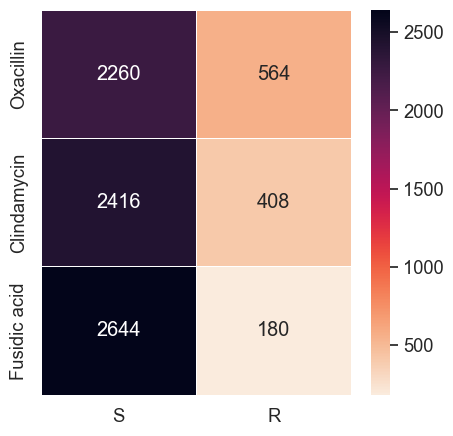

In [9]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.set(font_scale=1.2)
sns.heatmap(train_bac[antibiotics].apply(pd.Series.value_counts).T, annot=True, fmt="d", linewidth=.5, cmap="rocket_r")

In [10]:
train_bac[antibiotics].apply(pd.Series.value_counts).T

,S,R
Oxacillin,2260,564
Clindamycin,2416,408
Fusidic acid,2644,180


## Aggregated class distribution

In [11]:
# The number of rows for each combination of label values is counted.
value_counts = train_bac[antibiotics].value_counts()
df_value_counts = value_counts.rename("Count").to_frame().reset_index()

# Every combination possible is calculated, so that they are included in the table even if not present in the dataset.
options = profile[antibiotics[0]].unique()
combined = []
for i in range(len(antibiotics)):
    combined.append(options)
combinations = list(itertools.product(*combined))
df_combinations = pd.DataFrame(columns=antibiotics, data=combinations)

# The count is combined to the list of combinations.
df_combination_count = df_combinations.merge(df_value_counts, how="left").fillna(0).astype({"Count": "int"})
df_combination_count.sort_values(by=["Count"], ascending=False)

,Oxacillin,Clindamycin,Fusidic acid,Count
0,S,S,S,1931
4,R,S,S,335
2,S,R,S,228
6,R,R,S,150
1,S,S,R,87
5,R,S,R,63
7,R,R,R,16
3,S,R,R,14


Classes with 0 instances.

In [12]:
df_combination_count.loc[df_combination_count["Count"] == 0].drop("Count", axis=1)

,Oxacillin,Clindamycin,Fusidic acid


## Antibiotic Correlation

<Axes: >

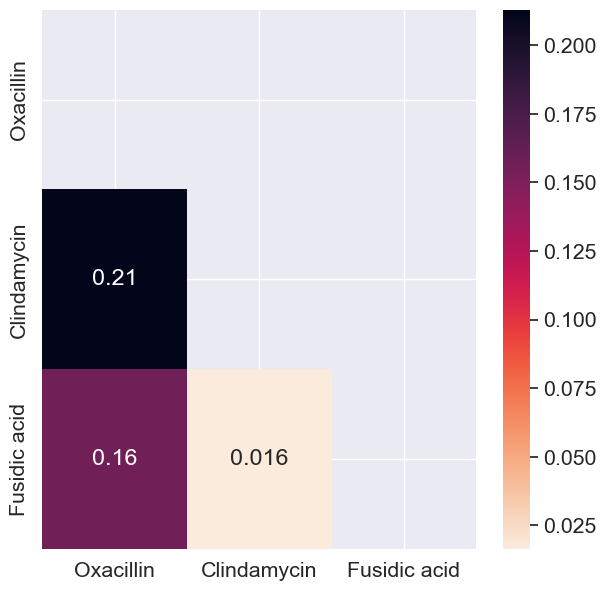

In [13]:
numeric_profile = profile.replace({'S': 0, 'R': 1})

sns.set(rc={'figure.figsize':(7, 7)})
corr = numeric_profile.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(font_scale=1.4)
sns.heatmap(corr, mask=mask, annot=True, cmap="rocket_r")

## Mean mass spectra

In [14]:
meltdata = train_bac.melt(antibiotics, var_name='Da', value_name='Value')
meltdata["Da"] = meltdata["Da"].astype(str).astype(int)
meltdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22592000 entries, 0 to 22591999
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Oxacillin     object 
 1   Clindamycin   object 
 2   Fusidic acid  object 
 3   Da            int32  
 4   Value         float64
dtypes: float64(1), int32(1), object(3)
memory usage: 775.6+ MB


In [15]:
linewidth = 2
label_size = 28
axis_tick_size = 28
legend_size = '24'
y_label_format = '{:,.3f}'
class_count = profile.value_counts().count()
palette = sns.color_palette("tab20")[:class_count]
sns.set(font_scale=1)
lower_limit = int(malditof.columns[0])
upper_limit = int(malditof.columns[-1])
jump = int((upper_limit - lower_limit + 1) / 20)


In [16]:
def one_antibiotic_lineplot(antibiotic):
    fig, axes = plt.subplots(1, 1, figsize=(30, 20))
    
    sns.set(font_scale = 2)
    line = sns.lineplot(ax=axes, data=meltdata, x="Da", y="Value", hue=antibiotic, 
                            palette={"S": "C0", "R": "C1"}, linewidth=linewidth)
    line.set(xticks=np.arange(lower_limit, upper_limit, jump))
    line.set_xlabel("Da", fontsize=label_size)
    line.set_ylabel("Value", fontsize=label_size)

    line.set_xticklabels(axes.get_xticks(), size=axis_tick_size)
    ticks_loc = axes.get_yticks()
    axes.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    axes.set_yticklabels([y_label_format.format(x) for x in ticks_loc], size=axis_tick_size)

    plt.setp(line.get_legend().get_texts(), fontsize=legend_size) 
    plt.setp(line.get_legend().get_title(), fontsize=legend_size) 
    axes.margins(x=0.005)

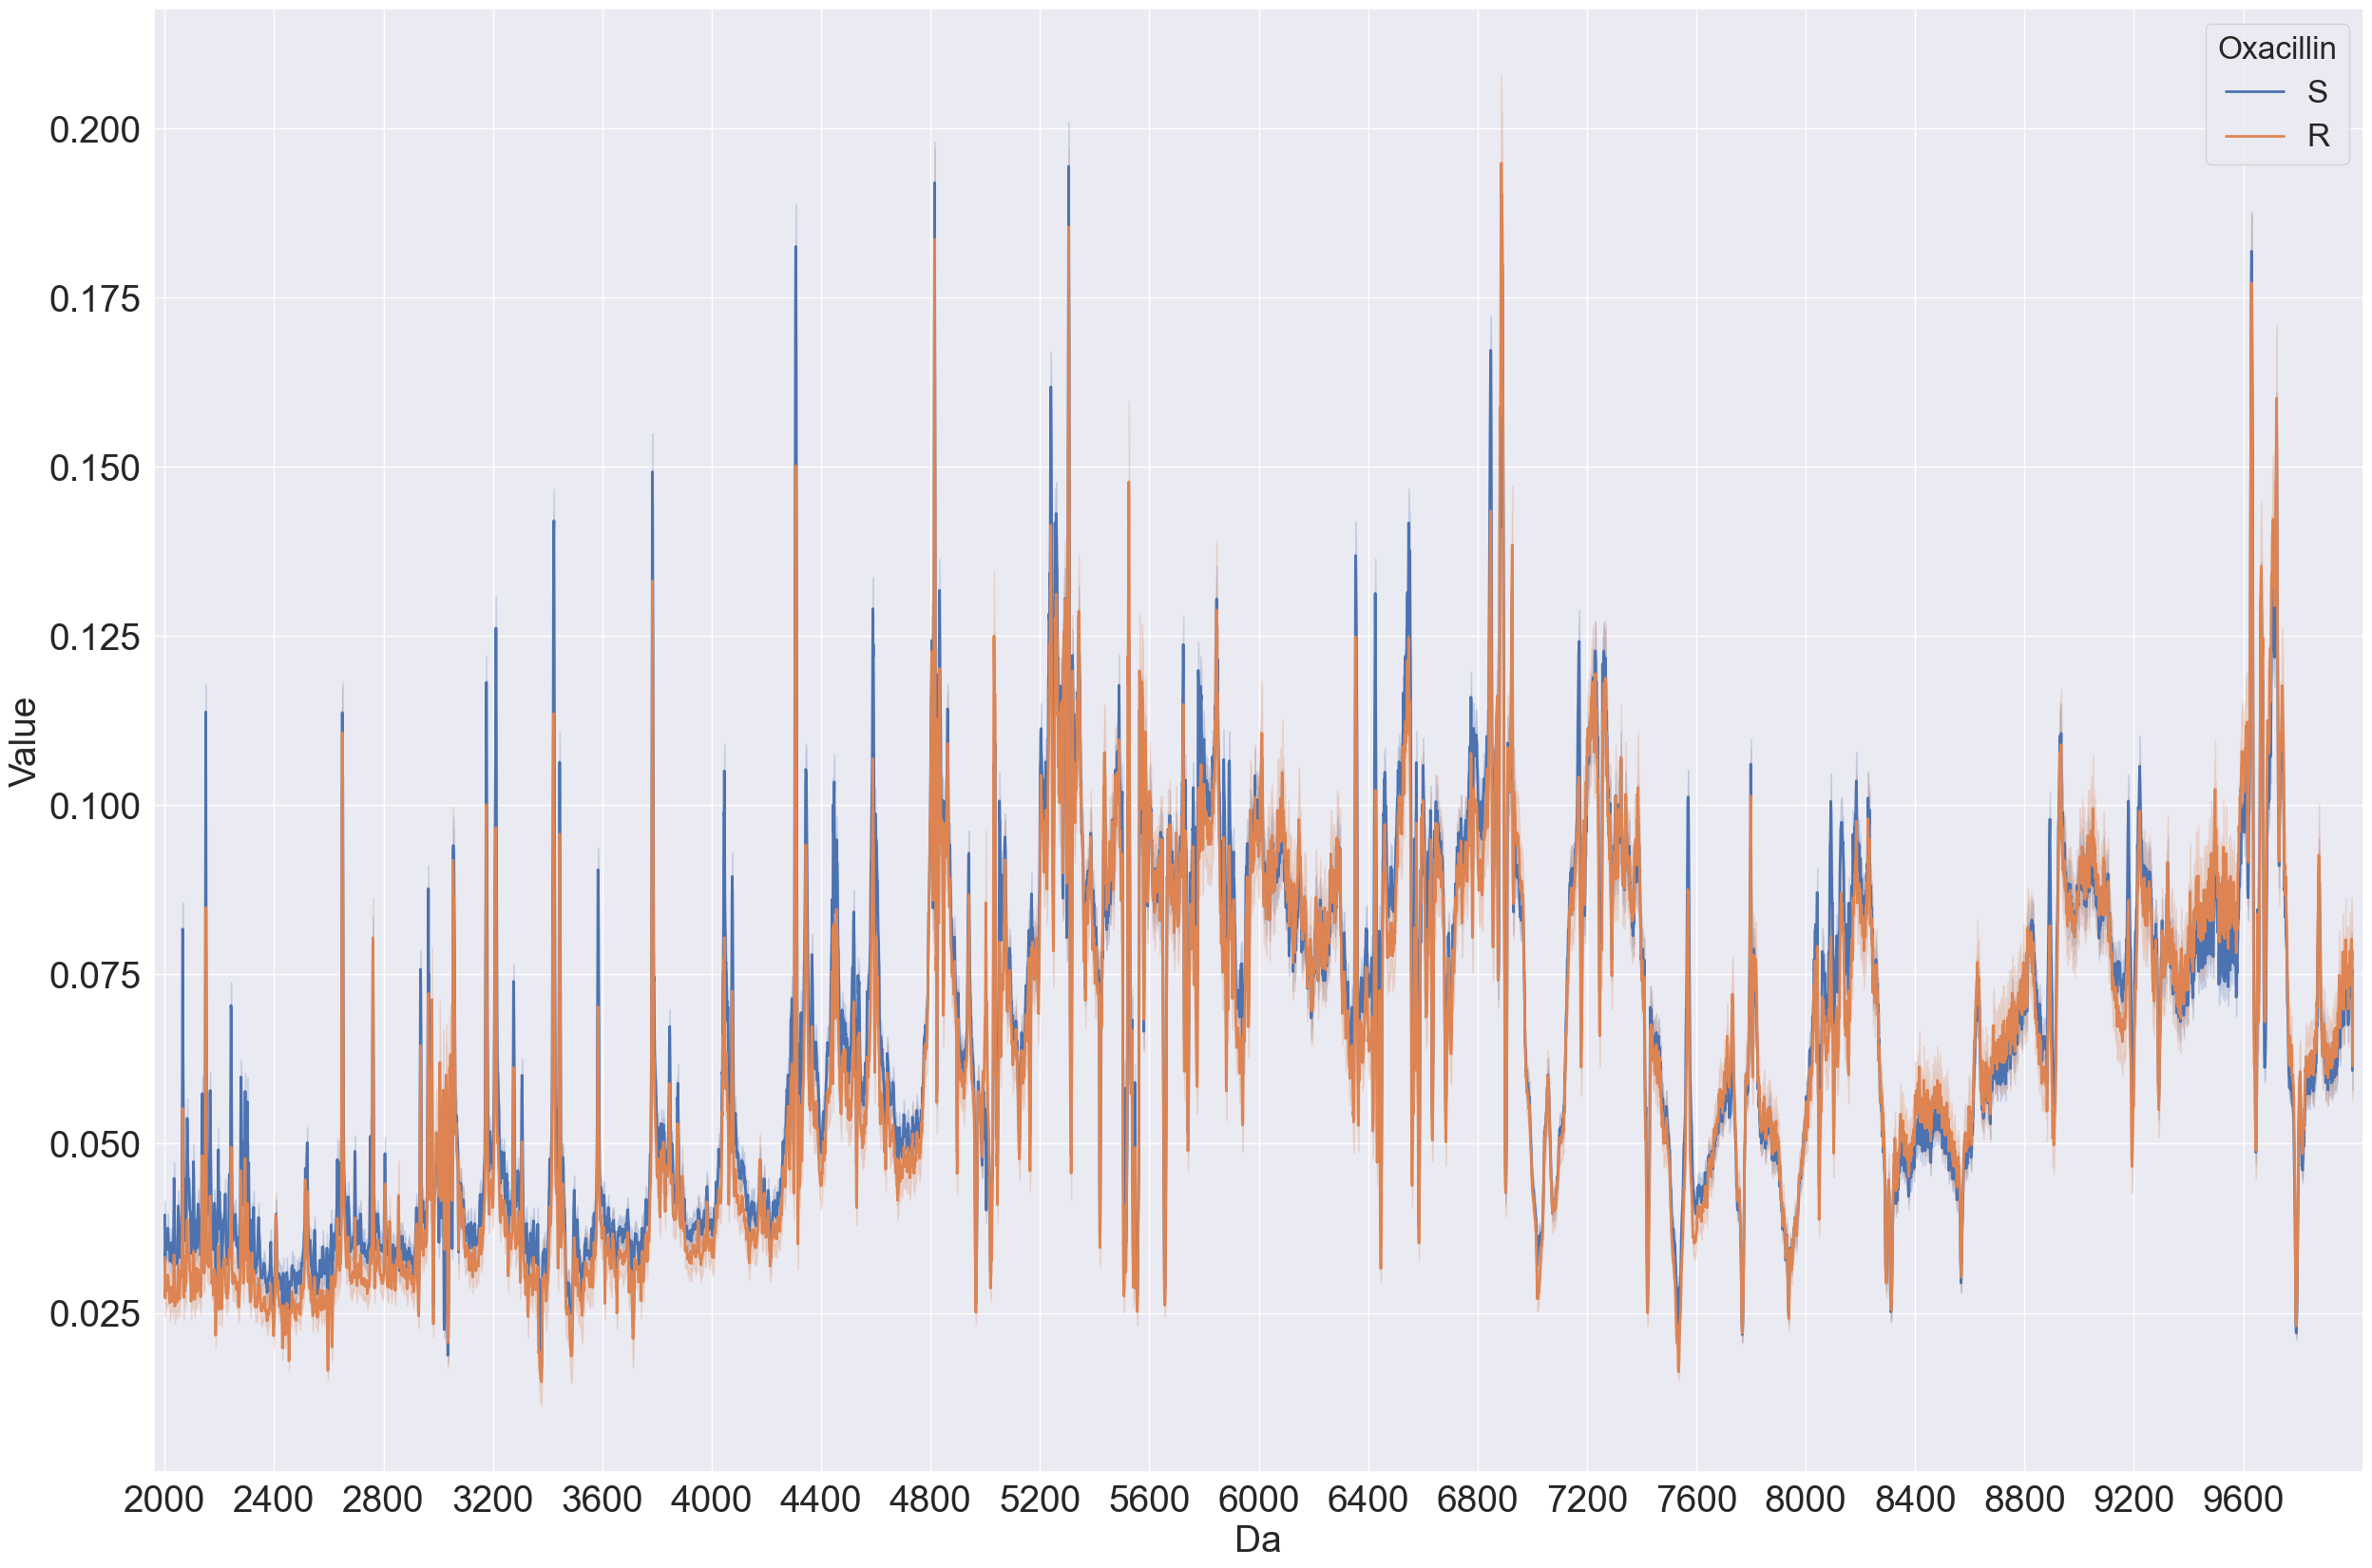

In [17]:
one_antibiotic_lineplot(antibiotics[0])

In [18]:
meltdata_lps = meltdata
meltdata_lps["Class"] = meltdata[antibiotics].agg(''.join, axis=1)
meltdata_lps["Class"] = meltdata_lps["Class"].astype(str)
meltdata_lps

,Oxacillin,Clindamycin,Fusidic acid,Da,Value,Class
0,S,S,S,2000,0.018721,SSS
1,S,S,S,2000,0.009001,SSS
2,S,S,S,2000,0.022354,SSS
3,S,S,S,2000,0.017619,SSS
4,S,S,S,2000,0.008264,SSS
...,...,...,...,...,...,...
22591995,S,R,S,9999,0.009238,SRS
22591996,S,R,S,9999,0.042142,SRS
22591997,S,S,S,9999,0.001744,SSS
22591998,R,R,S,9999,0.037402,RRS


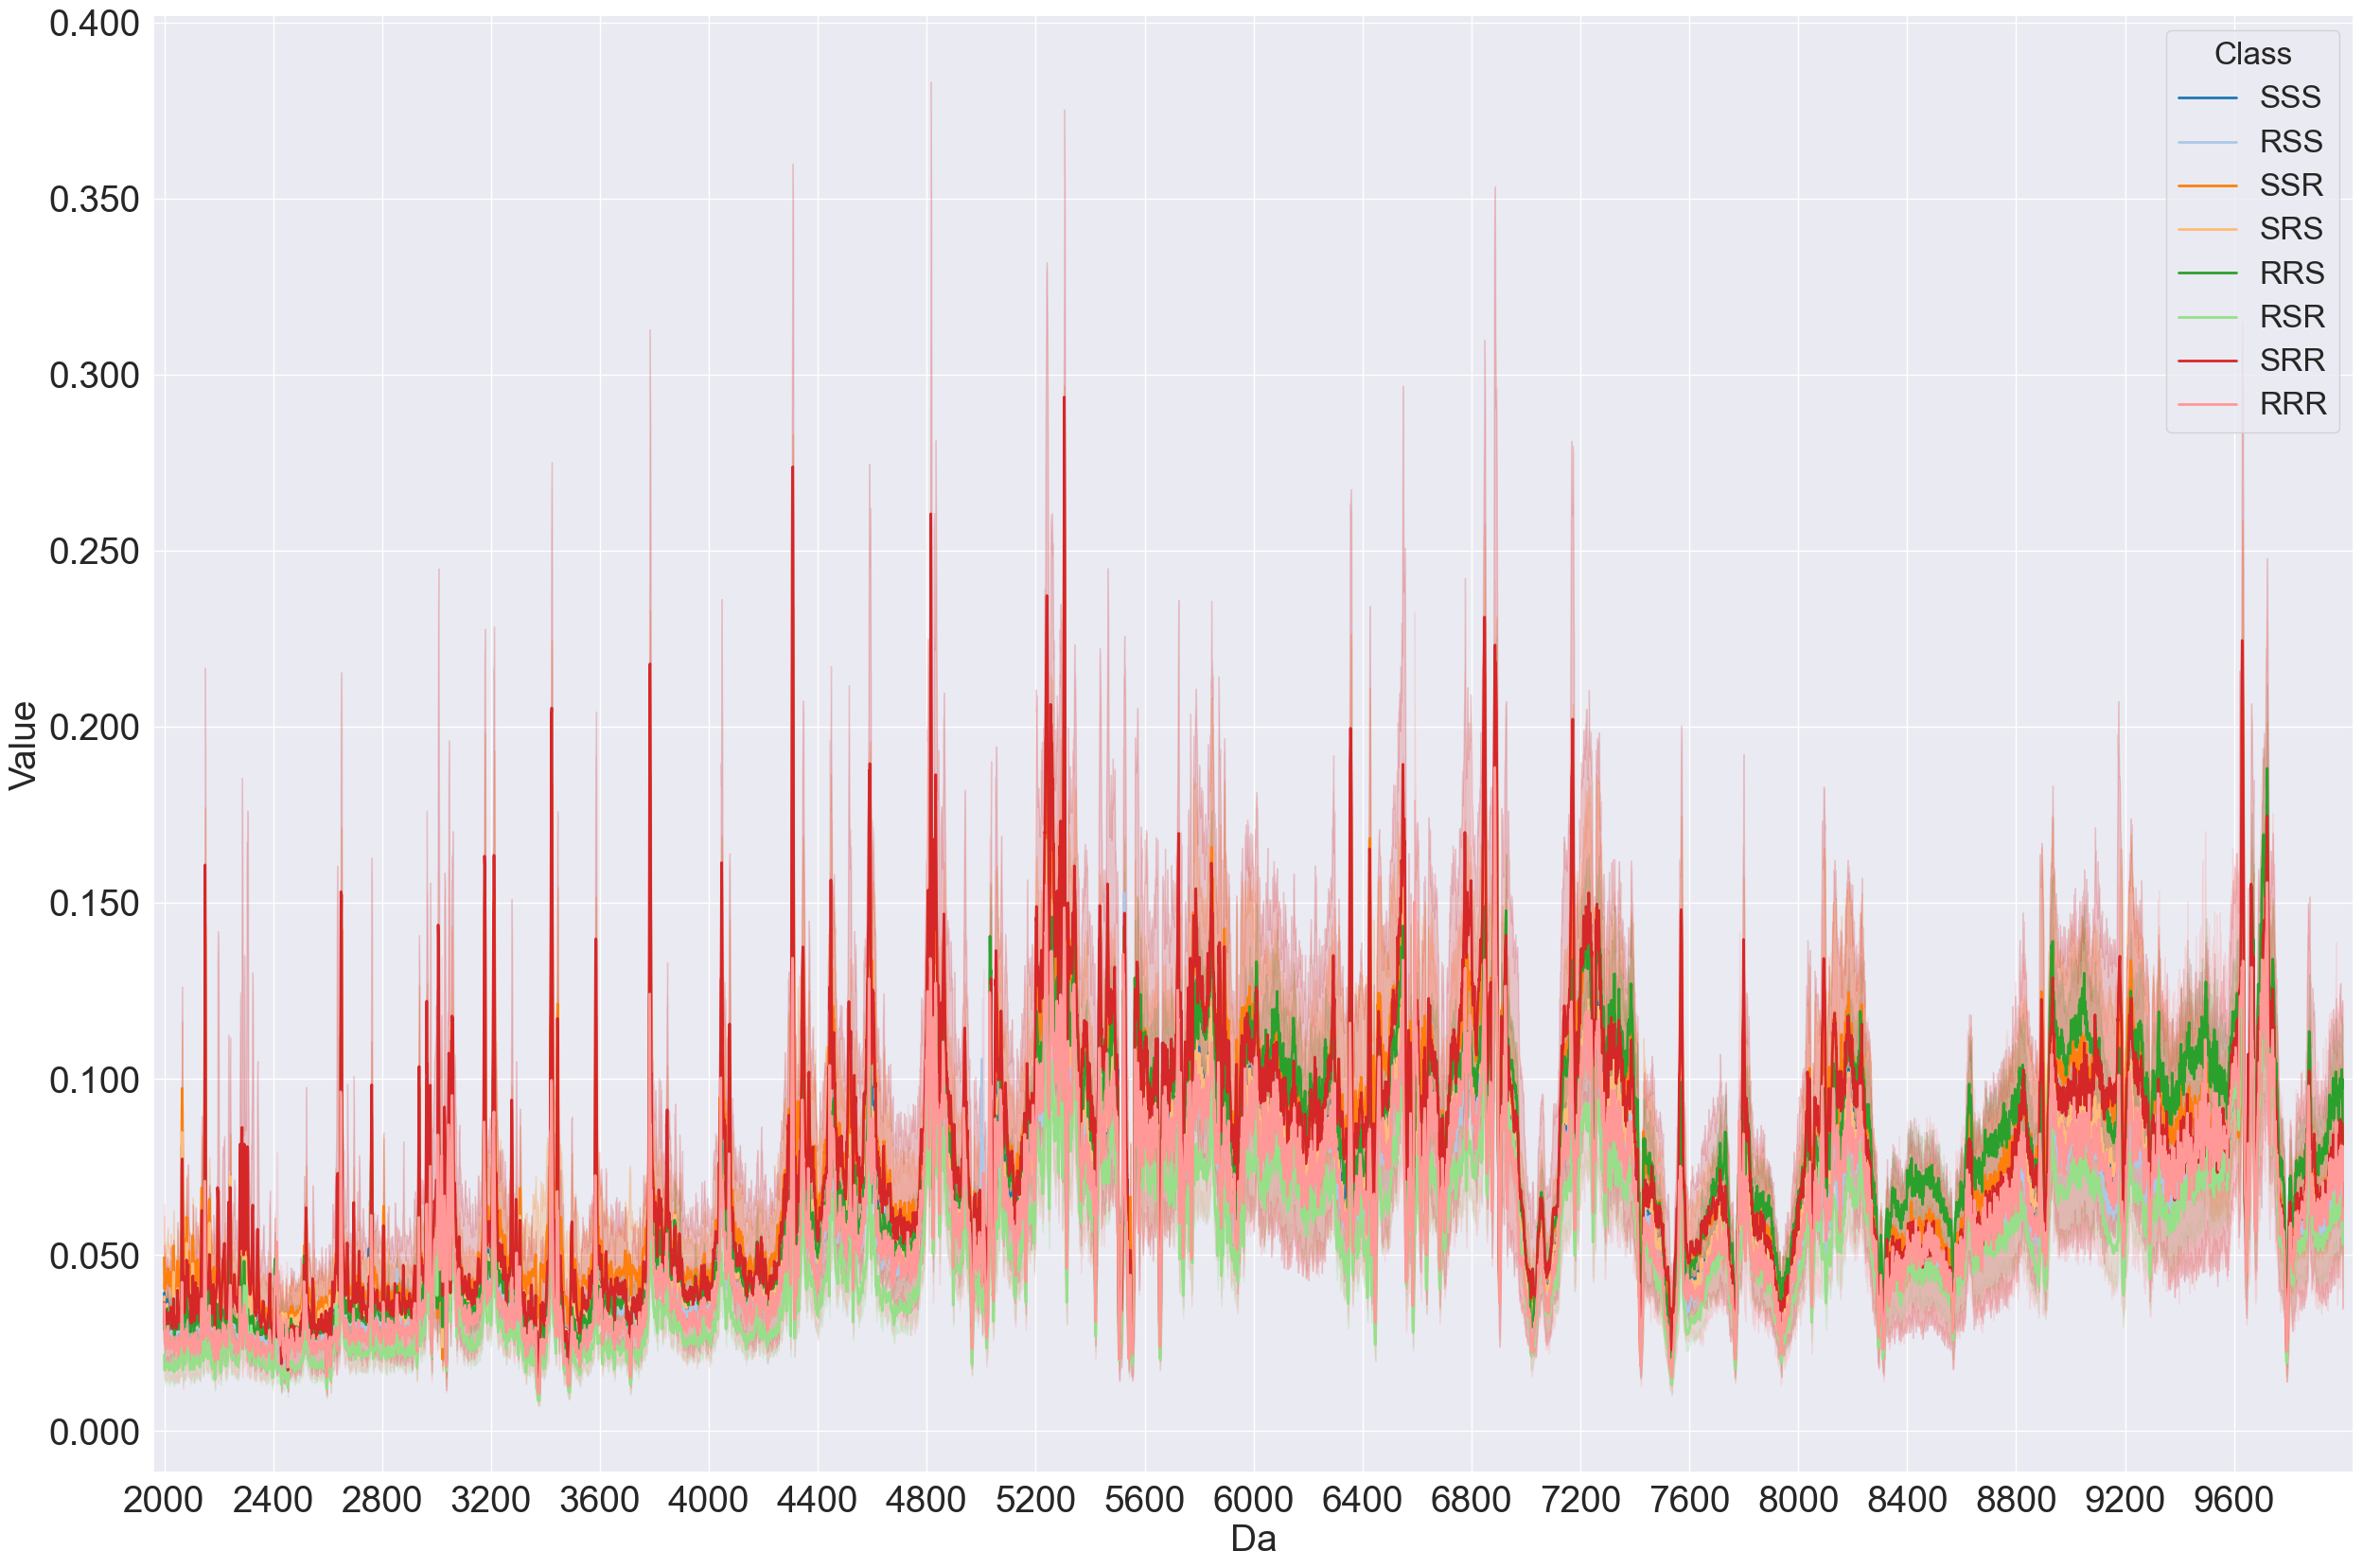

In [19]:
fig, axes = plt.subplots(figsize=(30, 20))

line = sns.lineplot(data=meltdata_lps, x="Da", y="Value", hue="Class", linewidth=linewidth, palette=palette)
line.set(xticks=np.arange(lower_limit, upper_limit, jump))
line.set_xlabel("Da", fontsize=label_size)
line.set_ylabel("Value", fontsize=label_size)

line.set_xticklabels(axes.get_xticks(), size=axis_tick_size)
ticks_loc = axes.get_yticks()
axes.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
axes.set_yticklabels([y_label_format.format(x) for x in ticks_loc], size=axis_tick_size)

plt.setp(line.get_legend().get_texts(), fontsize=legend_size) 
plt.setp(line.get_legend().get_title(), fontsize=legend_size) 

axes.margins(x=0.005)

## Scatter Plots

In [20]:
profile_lps = pd.DataFrame()
profile_lps["Class"] = train_bac[antibiotics].agg(''.join, axis=1)
profile_lps

,Class
0,SSS
1,SSS
2,SSS
3,SSS
4,SSS
...,...
2819,SRS
2820,SRS
2821,SSS
2822,RRS


In [21]:
lc = LabelEncoder()
lc.fit(profile_lps.values.ravel())
profile_lps_lc = lc.transform(profile_lps.values.ravel())
profile_lps_lc

array([7, 7, 7, ..., 7, 1, 7])

In [22]:
for i in range(class_count):
    print(str(i)+":", lc.inverse_transform([i]))

0: ['RRR']
1: ['RRS']
2: ['RSR']
3: ['RSS']
4: ['SRR']
5: ['SRS']
6: ['SSR']
7: ['SSS']


### PCA

In [23]:
pca = PCA(n_components=2, random_state=0)
pca.fit(malditof)
maldi_pca = pca.transform(malditof)

In [24]:
print("Variance of each column:", pca.explained_variance_ratio_)
print("Total:", pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])

Variance of each column: [0.71817848 0.09230926]
Total: 0.81048773780849


[Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4'), Text(0, 0, '5'), Text(0, 0, '6'), Text(0, 0, '7')]


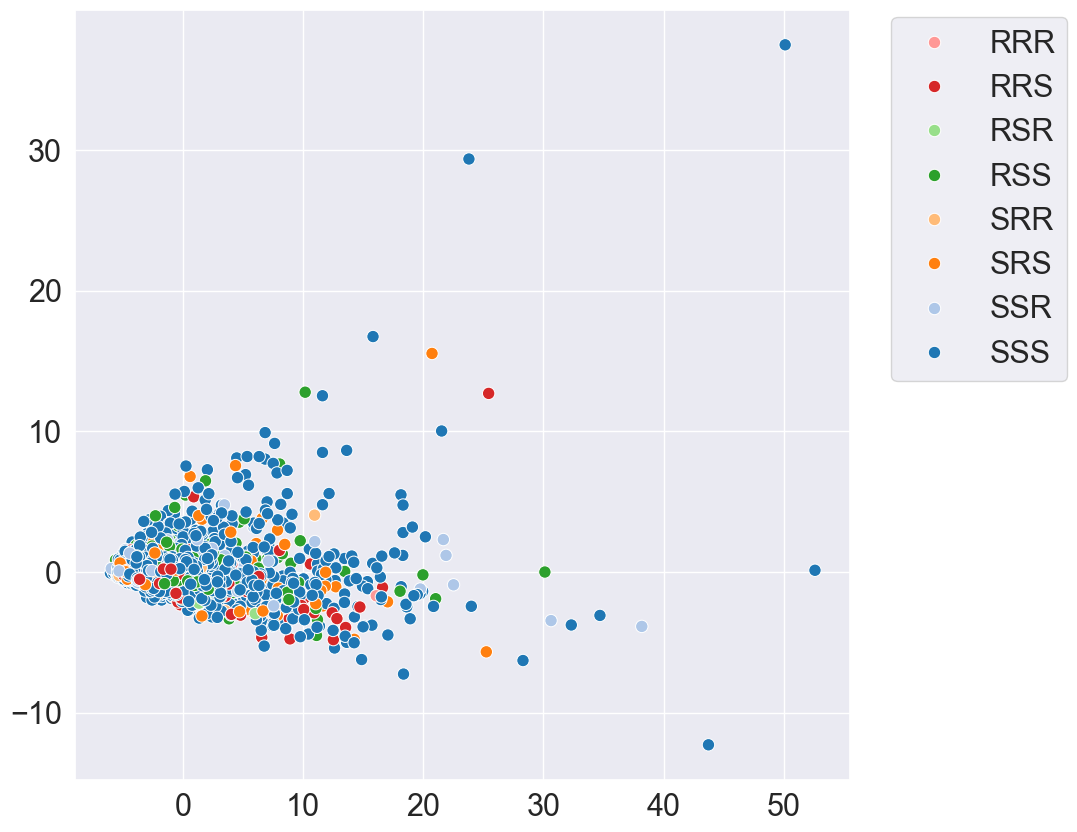

In [25]:
fig, axes = plt.subplots(figsize=(10, 10))

s = sns.scatterplot(x=maldi_pca[:, 0], y=maldi_pca[:, 1], hue=profile_lps_lc, s=80, palette=palette[::-1])

plt.setp(s.get_legend().get_texts(), fontsize="16") 
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.01))

print(s.legend_.texts)
for t, l in zip(s.legend_.texts, lc.inverse_transform(range(class_count))):
    t.set_text(l)

### T-SNE

In [26]:
def perform_tsne(x, y, perplexities, n_iter=1000):
    class_count = np.unique(y).size

    for index,perplexity in enumerate(perplexities):
        print("\nPerforming tsne with perplexity {} and with {} iterations at max".format(perplexity, n_iter))
        x_reduced = TSNE(verbose=0, perplexity=perplexity, n_jobs=-1, learning_rate=200.0, init="random", random_state=0).fit_transform(x)
        df = pd.DataFrame({"x":x_reduced[:,0], "y":x_reduced[:,1] , "label":y})

        fig, axes = plt.subplots(figsize=(10, 10))

        s = sns.scatterplot(data=df, x="x", y="y", hue=y, s=50, palette=palette[::-1])
        s.set(xlabel=None)
        s.set(ylabel=None)

        plt.setp(s.get_legend().get_texts(), fontsize="16") 
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.01))

        for t, l in zip(s.legend_.texts, lc.inverse_transform(range(class_count))):
            t.set_text(l)
        plt.show()
        print("Done")


Performing tsne with perplexity 20 and with 1000 iterations at max


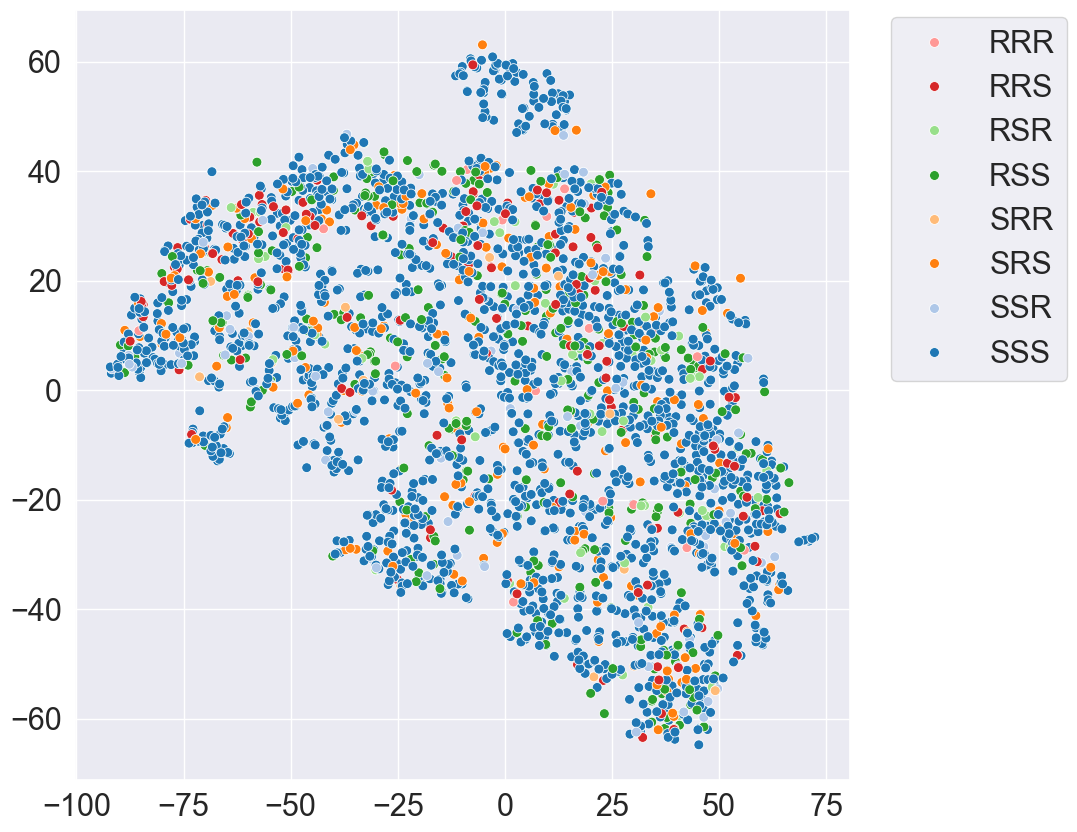

Done


In [27]:
perform_tsne(x=malditof, y=profile_lps_lc, perplexities=[20])